# Exploring Data from Prosper Loan: An Analysis

## by Ufoh, Anulika Stella

> Prosper Marketplace, Inc. is a company in the financial services sector located in San Francisco, California. It owns a subsidiary called Prosper Funding LLC, which runs an online platform called Prosper.com. This platform enables individuals to apply for personal loans, credit cards, or invest in loans.

> The dataset for Prosper Loans comprises 113,937 rows and 81 variables. It encompasses various details such as the loan's current status, investors, credit ratings, the service fees paid by investors, and many others. My analysis of the dataset focused on 8 variables out of the entire dataset.

> The set of 8 variables that I analyzed comprised ProsperRating (numeric), ProsperRating (alpha), Loan Status, Borrower APR, Debt-to-Income Ratio, Employment Status, Loan Amount, and Monthly Income.

## Preliminary Wrangling

In [2]:
# import all packages

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
# load dataseet
df = pd.read_csv('Prosper Loan.csv')

In [4]:
# preview dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.shape

(113937, 81)

### What is the structure of your dataset?
> The Prosper loan dataset comprises of 113,937 rows and 81 variables. Though, I analysed eight (8) variables.

### What is/are the main feature(s) of interest in your dataset?

> My primary interest is in the relationship between Prosper ratings and loan performance, specifically whether borrowers with higher ratings have lower default rates. By analyzing this relationship, I hope to identify strategies for mitigating the risks associated with high default rates and providing lenders with valuable insights.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some variables in the Prosper loan dataset that can help support my investigation into the relationship between Prosper ratings and loan performance include:
ProsperRating_(alpha), ProsperRating_(numeric), Loan Status, Borrower APR, Debt-to-Income Ratio, Employment Status, Loan Amount, and Monthly Income.

# Data Assessment

In [6]:
#display the entire columns
pd.set_option('display.max_columns',None)

In [7]:
#access random 10 sampless of the datasets
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
70200,BA3635750185082590DC17C,753577,13:24.3,NaN,36,Current,NaN,0.31032,0.2712,0.2612,0.2382,0.1275,0.1107,2.0,E,2.0,15,FL,Professional,Employed,212.0,True,False,NaN,15/04/2013 09:13,680.0,699.0,01/12/1989 00:00,13.0,8.0,37.0,7,465,2.0,4.0,0.0,0.0,0.0,0.0,0.0,13248.0,0.62,7952.0,36.0,0.97,2.0,0.27,"$50,000-74,999",True,5000.000000,7EF93680001633375A3687D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,11,88875,4000,26/04/2013 00:00,Q2 2013,7A4D35754883751161E9749,163.56,1635.6000,805.67,829.9300,-30.61,0.0,0.00,0.00,0.0,1.0,0,0,0.0,80
85116,58393585722011176F9AE28,857606,15:38.0,NaN,36,Current,NaN,0.14857,0.1203,0.1103,0.1061,0.0349,0.0712,6.0,A,7.0,2,OK,Medical Technician,Employed,23.0,False,False,NaN,01/08/2013 12:15,760.0,779.0,20/04/1996 00:00,4.0,3.0,28.0,2,25,1.0,4.0,0.0,0.0,0.0,0.0,0.0,990.0,0.09,9010.0,23.0,1.00,0.0,0.25,"$25,000-49,999",True,3333.333333,60C03689032863709B663C3,1.0,7.0,7.0,0.0,0.0,15000.0,0.00,30.0,0,NaN,7,98118,10000,09/08/2013 00:00,Q3 2013,7E803555143873767A8C3BC,332.29,3943.5741,3408.20,535.3741,-44.78,0.0,0.00,0.00,0.0,1.0,0,0,0.0,1
10198,A29033707937864981561AD,46306,39:32.9,C,36,Completed,03/03/2009 00:00,0.25757,0.2500,0.2350,NaN,NaN,NaN,NaN,NaN,NaN,0,IL,Other,Not available,NaN,True,True,DD17336621690487632377B,55:22.2,660.0,679.0,31/12/1998 00:00,NaN,NaN,9.0,1,10,5.0,9.0,1.0,NaN,4.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,Not displayed,True,6833.333333,FDF233700897764561FF10E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,89,3972,5000,17/10/2006 00:00,Q4 2006,2152336994729971153B7D2,198.80,6928.3900,5000.00,1928.3900,-40.18,0.0,0.00,0.00,0.0,1.0,0,0,0.0,50
95259,864B3535057166836910263,545076,54:01.6,NaN,36,Chargedoff,21/07/2013 00:00,0.18478,0.1559,0.1459,0.1434,0.0520,0.0914,5.0,B,7.0,1,NJ,Pilot - Private/Commercial,Employed,46.0,False,False,NaN,17/12/2011 15:53,660.0,679.0,08/12/1999 00:00,8.0,7.0,21.0,5,226,0.0,3.0,0.0,0.0,0.0,0.0,0.0,9744.0,0.45,11776.0,21.0,1.00,1.0,0.47,"$25,000-49,999",True,2500.000000,15CA3637411646648EA62D0,1.0,10.0,10.0,0.0,0.0,4000.0,3180.58,-57.0,354,19.0,27,57697,6000,21/12/2011 00:00,Q4 2011,BCE9350600038320524F138,209.73,5951.2200,5107.15,844.0700,-53.18,0.0,892.85,892.85,0.0,1.0,0,0,0.0,17
87497,70C0355144885471117D066,609946,51:40.8,NaN,36,Current,NaN,0.14328,0.1151,0.1051,0.1048,0.0330,0.0718,6.0,A,9.0,1,IN,Skilled Labor,Employed,269.0,False,False,NaN,10/07/2012 11:51,720.0,739.0,05/07/1990 00:00,12.0,10.0,

In [8]:
#check information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [9]:
# statistical data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [10]:
df.isnull().sum().sum()

1364086

## Observations

* The Prosper Rating (numeric) ranges from a minimum of 1.0 to a maximum of 7.0.

* Objects or floats were assigned to categorical variables (prosperRating_(alpha), employmentStatus, loanStatus)

* Float was assigned to StatedMonthlyIncome

* 136,4086 missing values

# Data Cleaning

In [11]:
# change the colunm titles to lowercase for easy analysis
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "")

In [12]:
# check the titles of the colunm
df.head(3)

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,estimatedeffectiveyield,estimatedloss,estimatedreturn,prosperrating(numeric),prosperrating(alpha),prosperscore,listingcategory(numeric),borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,currentlyingroup,groupkey,datecreditpulled,creditscorerangelower,creditscorerangeupper,firstrecordedcreditline,currentcreditlines,opencreditlines,totalcreditlinespast7years,openrevolvingaccounts,openrevolvingmonthlypayment,inquirieslast6months,totalinquiries,currentdelinquencies,amountdelinquent,delinquencieslast7years,publicrecordslast10years,publicrecordslast12months,revolvingcreditbalance,bankcardutilization,availablebankcardcredit,totaltrades,tradesneverdelinquent(percentage),tradesopenedlast6months,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loankey,totalprosperloans,totalprosperpaymentsbilled,ontimeprosperpayments,prosperpaymentslessthanonemonthlate,prosperpaymentsonemonthpluslate,prosperprincipalborrowed,prosperprincipaloutstanding,scorexchangeattimeoflisting,loancurrentdaysdelinquent,loanfirstdefaultedcyclenumber,loanmonthssinceorigination,loannumber,loanoriginalamount,loanoriginationdate,loanoriginationquarter,memberkey,monthlyloanpayment,lp_customerpayments,lp_customerprincipalpayments,lp_interestandfees,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.158,0.138,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,11/10/2001 00:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,12/09/2007 00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.092,0.082,0.0796,0.0249,0.0547,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,27/02/2014 08:28,680.0,699.0,18/03/1996 00:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,03/03/2014 00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.275,0.240,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,27/07/2002 00:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,17/01/2007 00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.0,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41


In [13]:
# convert category variables to category data type
df['prosperrating(alpha)'] = df['prosperrating(alpha)'].astype('category')

In [14]:
# convert category variables to category data type
df['prosperscore'] = df['prosperscore'].astype('category')

In [15]:
# convert category variables to category data type
df['loanstatus'] = df['loanstatus'].astype('category')

In [16]:
# convert category variables to category data type
df['employmentstatus'] = df['employmentstatus'].astype('category')

In [17]:
# convert statedmonthlyincome colunm to integer
df.statedmonthlyincome = df.statedmonthlyincome.astype(int) 

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   listingkey                           113937 non-null  object  
 1   listingnumber                        113937 non-null  int64   
 2   listingcreationdate                  113937 non-null  object  
 3   creditgrade                          28953 non-null   object  
 4   term                                 113937 non-null  int64   
 5   loanstatus                           113937 non-null  category
 6   closeddate                           55089 non-null   object  
 7   borrowerapr                          113912 non-null  float64 
 8   borrowerrate                         113937 non-null  float64 
 9   lenderyield                          113937 non-null  float64 
 10  estimatedeffectiveyield              84853 non-null   float64 
 11  

In [19]:
df.head()

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,estimatedeffectiveyield,estimatedloss,estimatedreturn,prosperrating(numeric),prosperrating(alpha),prosperscore,listingcategory(numeric),borrowerstate,occupation,employmentstatus,employmentstatusduration,isborrowerhomeowner,currentlyingroup,groupkey,datecreditpulled,creditscorerangelower,creditscorerangeupper,firstrecordedcreditline,currentcreditlines,opencreditlines,totalcreditlinespast7years,openrevolvingaccounts,openrevolvingmonthlypayment,inquirieslast6months,totalinquiries,currentdelinquencies,amountdelinquent,delinquencieslast7years,publicrecordslast10years,publicrecordslast12months,revolvingcreditbalance,bankcardutilization,availablebankcardcredit,totaltrades,tradesneverdelinquent(percentage),tradesopenedlast6months,debttoincomeratio,incomerange,incomeverifiable,statedmonthlyincome,loankey,totalprosperloans,totalprosperpaymentsbilled,ontimeprosperpayments,prosperpaymentslessthanonemonthlate,prosperpaymentsonemonthpluslate,prosperprincipalborrowed,prosperprincipaloutstanding,scorexchangeattimeoflisting,loancurrentdaysdelinquent,loanfirstdefaultedcyclenumber,loanmonthssinceorigination,loannumber,loanoriginalamount,loanoriginationdate,loanoriginationquarter,memberkey,monthlyloanpayment,lp_customerpayments,lp_customerprincipalpayments,lp_interestandfees,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,41:46.8,640.0,659.0,11/10/2001 00:00,5.0,4.0,12.0,1,24,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,12/09/2007 00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,27/02/2014 08:28,680.0,699.0,18/03/1996 00:00,14.0,14.0,29.0,13,389,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,03/03/2014 00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,09:10.1,480.0,499.0,27/07/2002 00:00,NaN,NaN,3.0,0,0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,17/01/2007 00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,22/10/2012 11:02,800.0,819.0,28/02/1983 00:00,5.0,5.0,29.0,7,115,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,01/11/2012 00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN,Executive,Employed,44.0,True,False,NaN,14/09/2013 18:38,680.0,699.0,20/02/2004 00:00,19.0,19.0,49.0,6,220,1.0,9.0,0.0,0.0,0.0,0.0,0.0,6193.0,0.81,695.0,39.0,0.95,2.0,0.26,"$100,000+",True,9583,A180369302188889200689E,1.0,11.0,11.

## Throughout my data exploration, I followed the "Question-Visualization-Observations" framework to examine individual data attributes and used exploratory data visuals to derive answers to specific questions.

## Univariate Exploration




In [20]:
# what is the distribution of loan original amount in the dataset?
# select the loan amount colunm
loan_amt = df.loanoriginalamount

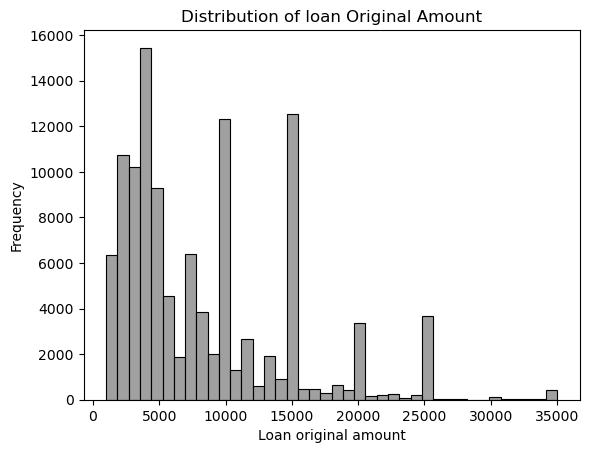

In [21]:
# create histogram plot of the loan original amount

sb.histplot(data=df, x='loanoriginalamount', bins=40, color='grey', edgecolor='black')

# set plot title and axis labels
plt.title('Distribution of loan Original Amount')
plt.xlabel('Loan original amount')
plt.ylabel("Frequency")

# show the plot
plt.show()


## Observations
>I noticed that the majority of loans made by the lender to borrowers had an original loan amount of approximately 4,000. Additionally, a significant number of loans were also issued with original amounts of 10,000 and 15,000.  
I also observed that the lender primarily provided loans between 1,000 and 25,000, with a lack of significant loan records above 25,000. Furthermore, as the loan amount increased, there was a decrease in the frequency of loans.

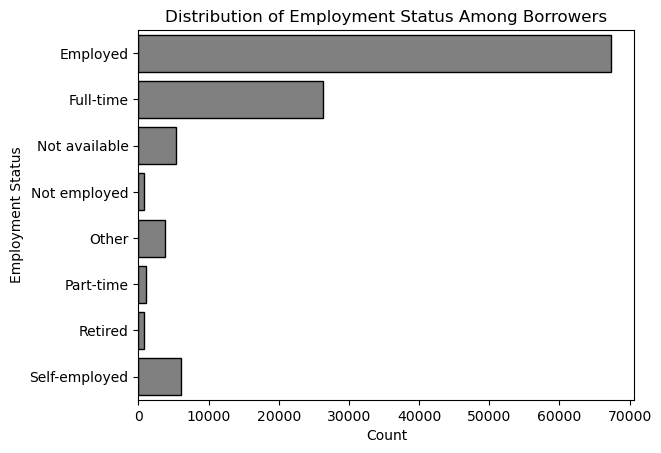

In [22]:
# what is the distribution of employment status among borrowers

# select the employment status colunm
employment_status = df.employmentstatus

# Create a bar chart using seaborn
sb.countplot(data=df, y='employmentstatus', color='grey', edgecolor='black')

# set the chart title and axis labels
plt.title('Distribution of Employment Status Among Borrowers')
plt.xlabel('Count')
plt.ylabel('Employment Status')

plt.grid(False)

# show the chart
plt.show()




## Observations

> I noticed that the majority of the borrowers, over 60,000, were employed, with over 20,000 having full-time jobs. It was apparent that the company provides loans to individuals who have a stable source of income.

## Bivariate Exploration

In [23]:
# what is the relationship between Borrower APR and Debt-to-Income Ratio?
# select borrowerapr
# select debttoincomeratio
borrower_apr = df.borrowerapr
debt_to_incomeratio = df.debttoincomeratio

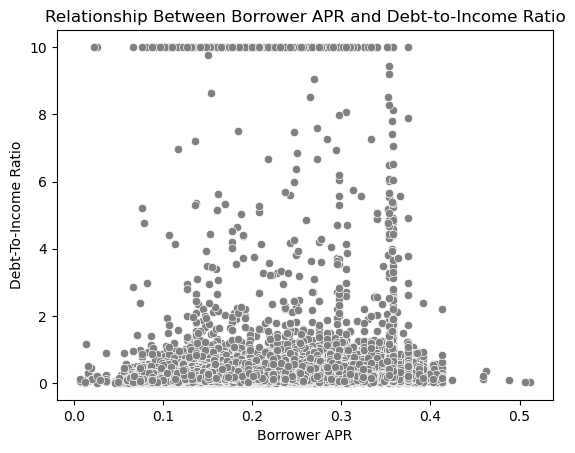

In [24]:
# Create scatter plot
sb.scatterplot(x="borrowerapr", y="debttoincomeratio", data= df, color='grey')

plt.title('Relationship Between Borrower APR and Debt-to-Income Ratio')
plt.xlabel('Borrower APR')
plt.ylabel('Debt-To-Income Ratio')

plt.grid(False)


# Show the plot
plt.show()

## Observations

> I have observed a negative correlation between the Borrower's APR and their Debt-to-Income Ratio. This indicates that as the Debt-to-Income Ratio increases, the Borrower's APR tends to decrease. This observation suggests that borrowers with a lower Debt-to-Income Ratio are perceived as less risky by lenders and are more likely to be offered loans with lower interest rates.
This trend could be due to the fact that borrowers with lower Debt-to-Income Ratios have a greater capacity to repay their loans, as they have a lower amount of debt relative to their income. As a result, lenders may view these borrowers as less likely to default on their loans, and therefore offer them lower interest rates to encourage them to borrow.

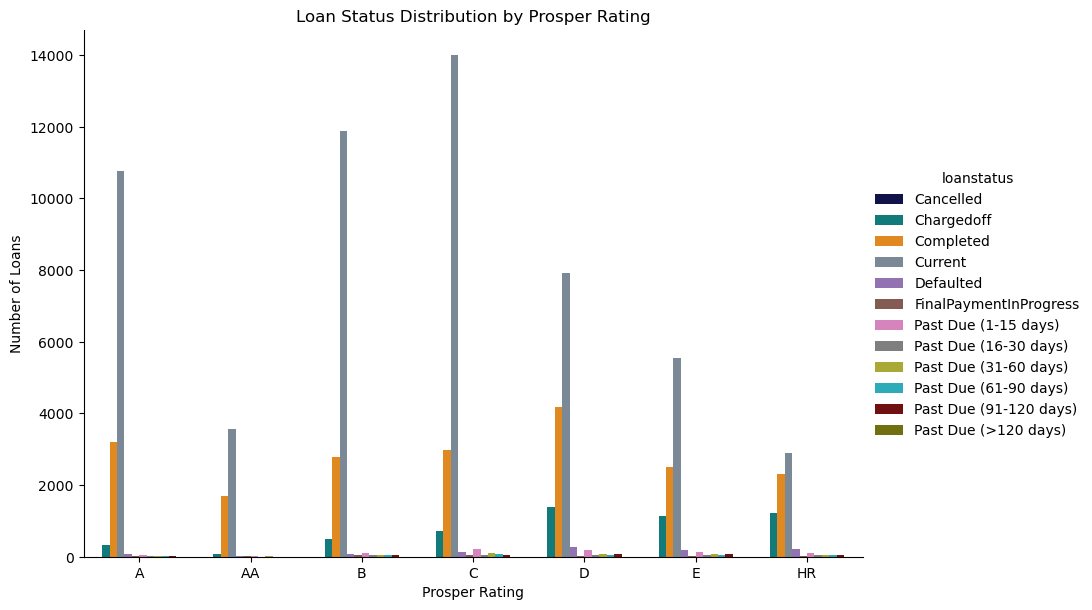

In [25]:
# what is the loan status distribution by prosper rating (alpha).
# Create a stacked bar chart using Seaborn

# Define a custom color palette
colors = ['#070A52', '#008B8B', '#FF8C00', '#778899', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#800000', '#808000']

# Create a grouped bar chart with custom colors
# Create a grouped bar chart
sb.catplot(x='prosperrating(alpha)', hue='loanstatus', data=df, kind='count', height=6, aspect=1.5, palette=colors)

# Set the title and axis labels
plt.title('Loan Status Distribution by Prosper Rating')
plt.xlabel('Prosper Rating')
plt.ylabel('Number of Loans')

plt.grid(False)

plt.show()


## Observations

> I have observed that loans with higher Prosper ratings, with the exception of AA, have a higher percentage of loans that are in good standing (i.e., current or completed), while lower Prosper ratings, such as D, have a significant proportion of loans in good standing but also a higher proportion of loans that are charged off, like E and HR. This implies that Prosper rating can be a useful predictive feature for loan status.

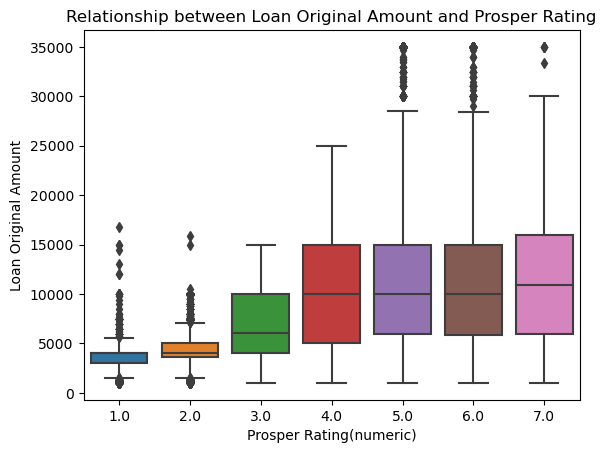

In [26]:
# Relationship between Loan Original Amount and Prosper Ratings
# Create box plot

sb.boxplot(x='prosperrating(numeric)', y='loanoriginalamount', data=df)


# Set the title and axis labels
plt.title('Relationship between Loan Original Amount and Prosper Rating')
plt.xlabel('Prosper Rating(numeric)')
plt.ylabel('Loan Original Amount')

plt.grid(False)

# Show the plot
plt.show()

## Observations

>I observed that borrowers with higher Prosper Ratings tend to receive larger loans than those with lower ratings, as indicated by the increasing median Loan Original Amount with higher ratings. Additionally, there is more variability in loan amounts offered to borrowers with higher ratings, as shown by the increasing interquartile range (IQR) of Loan Original Amount with higher Prosper Ratings. It is important to note that there are outliers in Prosper Rating category, particularly in the higher rating categories, which suggests that some borrowers with very high loan amounts are significantly affecting the distribution.

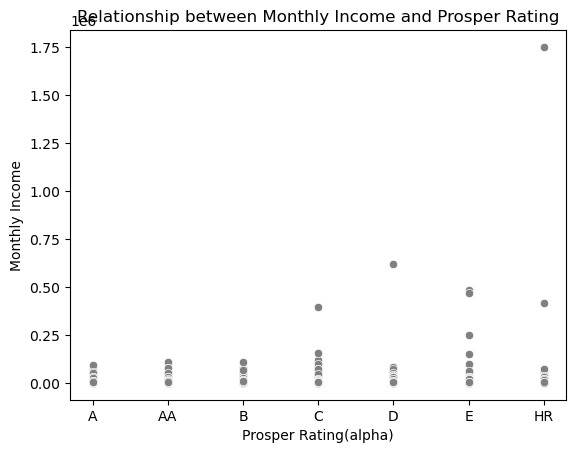

In [27]:
# Relationship between Monthly Income and Prosper Rating
# Create scatter plot
sb.scatterplot(x="prosperrating(alpha)", y="statedmonthlyincome", data= df, color='grey')

plt.title('Relationship between Monthly Income and Prosper Rating')
plt.xlabel('Prosper Rating(alpha)')
plt.ylabel('Monthly Income')

plt.grid(False)

# Show the plot
plt.show()

## Observations

> I have noticed a negative relationship between monthly income and Prosper rating. The scatter plot shows that higher monthly income tends to be associated with lower Prosper ratings.  This observation could suggest that borrowers with higher Prosper ratings may have lower incomes. Additionally, the scatter plot showed the presence of outliers, which may require further examination to determine their impact on the relationship between monthly income and Prosper rating.

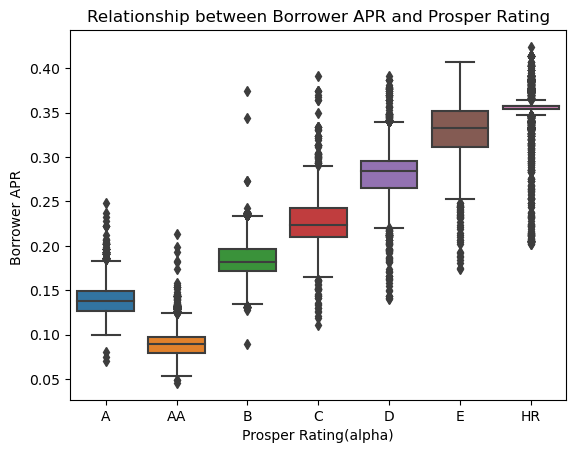

In [28]:
# what is the relationship between borrow apr and prosper rating?
sb.boxplot(x='prosperrating(alpha)', y='borrowerapr', data=df)

# Set the title and axis labels
plt.title('Relationship between Borrower APR and Prosper Rating')
plt.xlabel('Prosper Rating(alpha)')
plt.ylabel('Borrower APR ')
plt.show ()

## Observations 

> I noticed that as the Prosper rating increases, there is a decrease in the interquartile range (IQR) of the borrower APR, suggesting that the distribution of APRs becomes more concentrated around the median as borrower creditworthiness improves. This trend could indicate a relationship between Prosper ratings and loan performance, as borrowers with higher ratings are more likely to have a lower APR and may therefore have a lower risk of defaulting on their loans. However, there are outliers in certain Prosper rating categories, which may warrant further investigation.

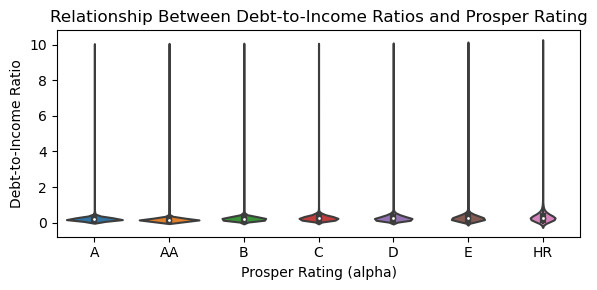

In [43]:
# relationship between debt-to-income ratio and Prosper rating

# create a stacked bar chart using seaborn

sb.violinplot(x='prosperrating(alpha)', y='debttoincomeratio', data=df)


plt.xlabel("Prosper Rating (alpha)")
plt.ylabel("Debt-to-Income Ratio")
plt.title("Relationship Between Debt-to-Income Ratios and Prosper Rating")
plt.gcf().set_size_inches(6, 3)
plt.tight_layout()


plt.grid(False)

plt.show()





## Observations

> I have observed that borrowers with lower Prosper ratings tend to have higher DTI ratios, which may result in higher interest rates or loan denials, while those with higher ratings tend to have lower ratios. These findings suggest that lenders perceive borrowers with higher Prosper ratings as less risky and are therefore more willing to offer them favorable loan terms. Furthermore, the analysis highlights the usefulness of a borrower's Prosper rating as a predictive feature for their DTI ratio.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> During my analysis, I discovered a noteworthy relationship between the Borrower APR and Debt-to-Income Ratio. It was apparent that as the Debt-to-Income Ratio increases, the corresponding Borrower APR tends to decrease. This indicates that borrowers with lower Debt-to-Income Ratios are viewed as less risky by lenders and are therefore more likely to receive loan offers with lower interest rates.

## Conclusion

> Based on the analysis of data from the Prosper Loan dataset, it can be concluded that there is a strong relationship between Prosper ratings and loan performance. Borrowers with higher Prosper ratings are more likely to have lower APRs, lower debt-to-income ratios, and higher loan amounts. The data also suggests that lenders perceive borrowers with higher Prosper ratings as less risky and are more willing to offer them favorable loan terms. However, there are some outliers and variations in loan performance, even among borrowers with the same Prosper ratings, indicating that other factors beyond creditworthiness may also impact loan performance. Therefore, lenders should not solely rely on Prosper rating when assessing a borrower's creditworthiness but should also consider other factors such as employment status, income, and payment history to make informed lending decisions. Overall, the analysis highlights the importance of Prosper ratings in assessing borrower creditworthiness.